In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Dhaka Rent.csv")
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [3]:
#Dependent x 
#Independent y

x = df.drop("rent", axis=1)

In [4]:
#df.drop("rent", axis=1, inplace=True)

In [5]:
x.head()

,area
0,2000
1,2100
2,2500
3,2250
4,3000


In [6]:
x.shape

(60, 1)

In [7]:
y = df["rent"]

In [8]:
y.head()

0    31500
1    35000
2    41050
3    36100
4    52100
Name: rent, dtype: int64

In [9]:
y.shape

(60,)

In [10]:
# Visualization

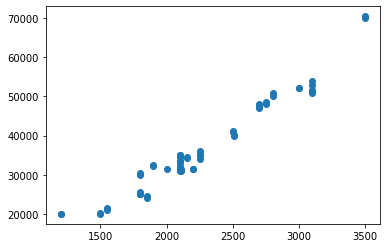

In [11]:
plt.scatter(x,y)

Text(0, 0.5, 'Rent')

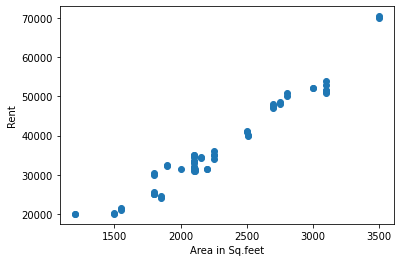

In [12]:
plt.scatter(x,y)
plt.xlabel("Area in Sq.feet")
plt.ylabel("Rent")

In [13]:
# x = area
# y = rent

In [14]:
x.mean()

area    2289.0
dtype: float64

In [15]:
y.mean()

37269.166666666664

In [16]:
# splitting

from sklearn.model_selection import train_test_split
train,test = train_test_split(df,test_size=.30)


In [17]:
train.head()

,area,rent
56,2750,48500
31,2100,35010
49,2700,47500
43,2510,40000
19,2700,47000


In [18]:
train.shape

(42, 2)

In [19]:
df.shape

(60, 2)

In [20]:
test.head()

,area,rent
27,1800,25000
8,2700,48000
1,2100,35000
40,2150,34400
41,2100,32020


In [21]:
test.shape

(18, 2)

In [23]:
# Seperation
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.30, random_state=42)

In [24]:
xtrain.head()

,area
40,2150
4,3000
43,2510
19,2700
34,3000


In [25]:
ytrain.head()

40    34400
4     52100
43    40000
19    47000
34    52200
Name: rent, dtype: int64

In [26]:
# Linear Regression

from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [27]:
reg.fit(xtrain, ytrain)

LinearRegression()

In [28]:
reg.coef_

array([20.68636687])

In [29]:
reg.intercept_

-10252.90474033673

In [30]:
reg.predict([[2510]])

c:\Users\HP-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41669.87610729])

In [31]:
residual = 41669.87610729-40000
residual

1669.8761072900015

In [32]:
# y=mx+c

y = (reg.coef_)*2510+(reg.intercept_)
y

array([41669.87610729])

In [33]:
xtest.head()

,area
0,2000
5,1900
36,1500
45,3100
13,2510


In [34]:
reg.predict(xtest) # corresponding to ytest

array([31119.82900279, 29051.19231563, 20776.64556701, 53874.83256151,
       41669.87610729, 47668.92250004, 36291.42072068, 26982.55562848,
       33188.46568994, 26982.55562848, 26982.55562848, 33395.32935866,
       33188.46568994, 36291.42072068, 62149.37931013, 21810.96391059,
       45600.28581288, 20776.64556701])

In [35]:
ytest

0     31500
5     32500
36    20200
45    51000
13    40050
54    51000
33    35100
48    25500
12    34500
57    25100
46    30000
50    31000
31    35010
3     36100
52    70500
17    21000
8     48000
6     20000
Name: rent, dtype: int64

In [36]:
pred = reg.predict(xtest)
pred

array([31119.82900279, 29051.19231563, 20776.64556701, 53874.83256151,
       41669.87610729, 47668.92250004, 36291.42072068, 26982.55562848,
       33188.46568994, 26982.55562848, 26982.55562848, 33395.32935866,
       33188.46568994, 36291.42072068, 62149.37931013, 21810.96391059,
       45600.28581288, 20776.64556701])

In [37]:
# MSE

from sklearn.metrics import mean_squared_error

In [38]:
mse = mean_squared_error(ytest,pred)
mse

7677066.248378809

In [39]:
# MAE
from sklearn.metrics import mean_absolute_error

In [40]:
mae = mean_absolute_error(ytest,pred)
mae

2103.50832336242

In [41]:
reg.score(xtest,ytest)

0.9515542918540623

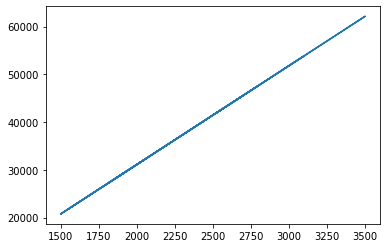

In [42]:
# Best fit line

plt.plot(xtest,pred)

ValueError: x and y must be the same size

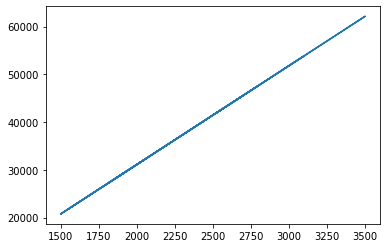

In [43]:

plt.plot(xtest.squeeze(),pred)
plt.scatter(x,y)
plt.xlabel("Area in Sq.feet")
plt.ylabel("Rent")